In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-adapt-basic)

Let's run adaptive RK on  $u'=e^{t-u\sin u}$.

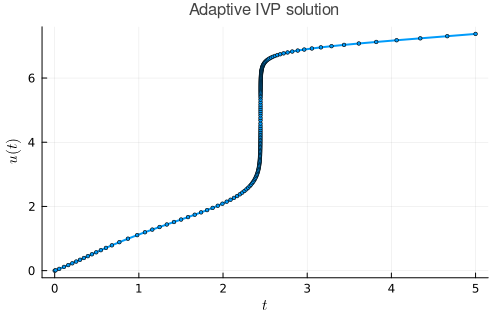

In [2]:
using OrdinaryDiffEq, Plots
f(u, p, t) = exp(t - u * sin(u))
ivp = ODEProblem(f, 0, (0.0, 5.0))
t, u = FNC.rk23(ivp, 1e-5)
plot(t, u, m=2,
    xlabel=L"t",  ylabel=L"u(t)", 
    title="Adaptive IVP solution")

The solution makes a very abrupt change near $t=2.4$. The resulting time steps vary over three orders of magnitude.

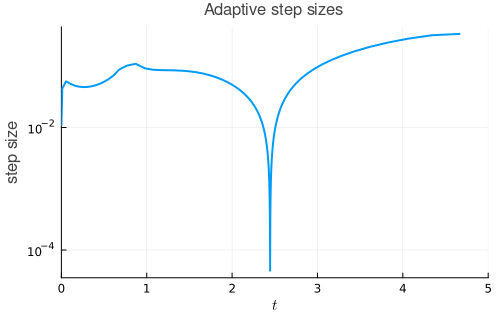

In [3]:
Δt = diff(t)
plot(t[1:end-1], Δt;
    xaxis=(L"t", (0, 5)), yaxis=(:log10, "step size"),
    title="Adaptive step sizes")

If we had to run with a uniform step size to get this accuracy, it would be

In [4]:
println("minimum step size = $(minimum(Δt))")

minimum step size = 4.6096854609878335e-5


On the other hand, the average step size that was actually taken was

In [5]:
println("average step size = $(sum(Δt)/(length(t)-1))")

average step size = 0.03205128205128205


We took fewer steps by a factor of almost 1000! Even accounting for the extra stage per step and the occasional rejected step, the savings are clear.